### Task 2

#### UNSUPERVISED     LEARNING

### K- Means clustering

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

In [2]:
#reading data
iris=datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


#### Finding the optimum number of clusters for k-means classification

In [15]:
df=df.iloc[:,[0,1,2,3]].values

In [16]:
from sklearn.cluster import KMeans

In [22]:
wcss = []   # within cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) # inertia method returns wcss for that model 
wcss
                                                                

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.469495898838005,
 30.1865551948052,
 28.289370851370855,
 26.55237314156432]

#### Using Elbow graph tp find optimum no. of clusters

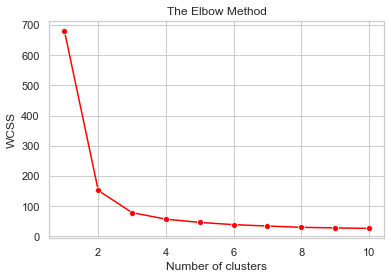

In [26]:
import seaborn as sns
sns.set(style='whitegrid')
sns.lineplot(range(1,11),wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Optimum value for K would be 3.

In [7]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y=kmeans.fit_predict(x)

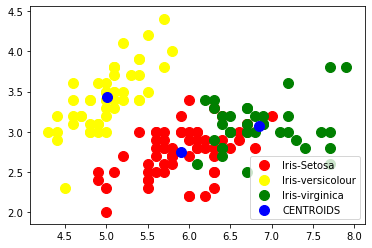

In [8]:
plt.scatter(x[pred_y==0,0],x[pred_y==0,1],s=100,color='red',label='Iris-Setosa')
plt.scatter(x[pred_y==1,0],x[pred_y==1,1],s=100,color='yellow',label='Iris-versicolour')
plt.scatter(x[pred_y==2,0],x[pred_y==2,1],s=100,color='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='CENTROIDS')
plt.legend()


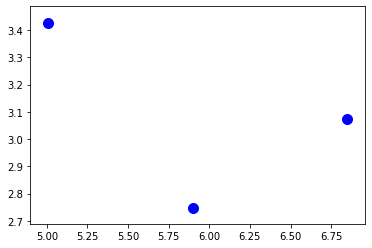

In [9]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='CENTROIDS')

## COMPLETED!!